In [3]:
import pandas as pd
import numpy as np

In [14]:
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
import pymorphy3

In [137]:
df_posts = pd.read_csv('posts.csv')
df_posts.head()

,Unnamed: 0,post_id,post_text
0,0,12103,"Итак 2024 наступил и скоро выборы, за кого гол..."
1,1,12266,Последнего реального кандидата от оппозиции и ...
2,2,12228,"Минутка на оппозицию...\n⚡«Неllо, Еlеnа Zelens..."
3,3,12191,"Не допущен к выборам, по опросам у него не бол..."
4,4,12183,Более не сможет быть кандидатом в Президенты -...


In [108]:
df_comments = pd.read_csv('comments.csv')
df_comments.head()

,Unnamed: 0,post_id,comments_text
0,0,12103.0,"Зачем эта игра в ""демократию"" ?! Результат уже..."
1,1,12103.0,За Бориса Борисовича Надеждина!!!
2,5,12103.0,"Я бы вообще , голосовал за Ярослава Нилова !"
3,6,12103.0,"Интересно, если бы хоть раз выборы прошли чест..."
4,7,12103.0,Выборы - без выбора. Вообще не за кого!!!


**ТОКЕНИЗАЦИЯ ТЕКСТА**

In [21]:
stop_words = stopwords.words('russian')
morph = pymorphy3.MorphAnalyzer()

In [56]:
def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    :param raw_text: исходная текстовая строка
    """
    # Разбиение на сслова при помощи пробела
    words = raw_text.split()
    # Подготовка регулярного выражения для фильтрации символов
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # Удаление знаков препинания
    stripped = [re_punc.sub('', w) for w in words]
    # Приведение всех слов к нижнему регистру
    words_lower = [w.lower() for w in stripped]
    # Удаление оставшихся токенов, которые не являются буквами
    words_alpha = [word for word in words_lower if word.isalpha()]
    # Удаление стоп-слов    
    words_stop = [w for w in words_alpha if not w in stop_words]
    # Лемматизация    
    tokens = [morph.parse(token)[0].normal_form for token in words_stop]
    # Удалим короткие токены
    tokens = [word for word in tokens if len(word) > 1]

    return tokens

**1. Токенизация постов Сообщества "Выборы Президента России 2024"**

In [138]:
# применяем функцию к датафрейму с помощью метода .apply()
tokenized= df_posts.post_text.apply(tokenize_text)

In [139]:
# добавляем новую колонку в исходный датафрейм
df_posts = df_posts.assign(tokenized=tokenized)
df_posts.head()

,Unnamed: 0,post_id,post_text,tokenized
0,0,12103,"Итак 2024 наступил и скоро выборы, за кого гол...","[итак, наступить, скоро, выборы, кто, голосовать]"
1,1,12266,Последнего реального кандидата от оппозиции и ...,"[последний, реальный, кандидат, оппозиция, либ..."
2,2,12228,"Минутка на оппозицию...\n⚡«Неllо, Еlеnа Zelens...","[минутка, оппозиция, еlеn, байден, пoпpиветcтв..."
3,3,12191,"Не допущен к выборам, по опросам у него не бол...","[допустить, выборы, опрос, последователь, увер..."
4,4,12183,Более не сможет быть кандидатом в Президенты -...,"[смочь, кандидат, президент, умереть, колония,..."


**2. Токенизация комментариев к постам Сообщества "Выборы Президента России 2024"**

In [109]:
# применяем функцию к датафрейму с помощью метода .apply()
tokenized= df_comments.comments_text.apply(tokenize_text)

In [110]:
# добавляем новую колонку в исходный датафрейм
df_comments = df_comments.assign(tokenized=tokenized)
df_comments.head()

,Unnamed: 0,post_id,comments_text,tokenized
0,0,12103.0,"Зачем эта игра в ""демократию"" ?! Результат уже...","[этот, игра, демократия, результат, итак, изве..."
1,1,12103.0,За Бориса Борисовича Надеждина!!!,"[борис, борисович, надеждин]"
2,5,12103.0,"Я бы вообще , голосовал за Ярослава Нилова !","[вообще, голосовать, ярослав, ниловый]"
3,6,12103.0,"Интересно, если бы хоть раз выборы прошли чест...","[интересно, выборы, пройти, честно, расклад, д..."
4,7,12103.0,Выборы - без выбора. Вообще не за кого!!!,"[выборы, выбор, вообще, кто]"


In [9]:
df_posts = pd.read_csv('posts_tokenised.csv')
df_posts.head()

,Unnamed: 0.1,Unnamed: 0,post_id,post_text,tokenized,tokens
0,0,0,12103,"Итак 2024 наступил и скоро выборы, за кого гол...","['итак', 'наступить', 'скоро', 'выборы', 'кто'...","['итак', 'наступить', 'скоро', 'выборы', 'кто'..."
1,1,1,12266,Последнего реального кандидата от оппозиции и ...,"['последний', 'реальный', 'кандидат', 'оппозиц...","['последний', 'реальный', 'кандидат', 'оппозиц..."
2,2,2,12228,"Минутка на оппозицию...\n⚡«Неllо, Еlеnа Zelens...","['минутка', 'оппозиция', 'еlеn', 'байден', 'пo...","['минутка', 'оппозиция', 'еlеn', 'байден', 'пo..."
3,3,3,12191,"Не допущен к выборам, по опросам у него не бол...","['допустить', 'выборы', 'опрос', 'последовател...","['допустить', 'выборы', 'опрос', 'последовател..."
4,4,4,12183,Более не сможет быть кандидатом в Президенты -...,"['смочь', 'кандидат', 'президент', 'умереть', ...","['смочь', 'кандидат', 'президент', 'умереть', ..."


**Разведочный анализ данных**

**1. Посты сообщества "Выборы Президенрта России 2024"**

In [21]:
from nltk.probability import FreqDist

In [15]:
words_list_posts = list(df_posts['tokens'])

In [23]:
#all_words_posts = np.concatenate(words_list_posts)

all_words_freq_posts = FreqDist(words_list_posts)

print("Наиболлее популярные слова: ", all_words_freq_posts.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_posts.keys()))

Наиболлее популярные слова:  [("['биография', 'история', 'жизнь', 'владимир', 'владимирович', 'путин', 'детство', 'юность', 'родиться', 'октябрь', 'ленинград', 'согласно', 'собственный', 'ответ', 'время', 'перепись', 'население', 'русский', 'национальный', 'принадлежность', 'отец', 'путин', 'владимир', 'спиридонович', 'путин', 'участник', 'вов', 'боец', 'стрелковый', 'полка', 'дивизия', 'красный', 'армия', 'воевать', 'защищать', 'невский', 'пятачок', 'тяжело', 'ранить', 'война', 'служить', 'подводный', 'флот', 'война', 'мастер', 'завод', 'егоров', 'мать', 'мария', 'иванович', 'шеломов', 'также', 'работать', 'завод', 'пережить', 'блокада', 'ленинград', 'дед', 'спиридон', 'иванович', 'путин', 'известный', 'повар', 'готовить', 'высокий', 'партийный', 'государственный', 'чин', 'приходиться', 'готовить', 'ленин', 'сталин', 'владимир', 'третий', 'сын', 'семья', 'двое', 'старший', 'брат', 'родиться', 'ещё', 'тридцатый', 'умереть', 'детство', 'стать', 'известно', 'один', 'брат', 'звать', 'викт

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


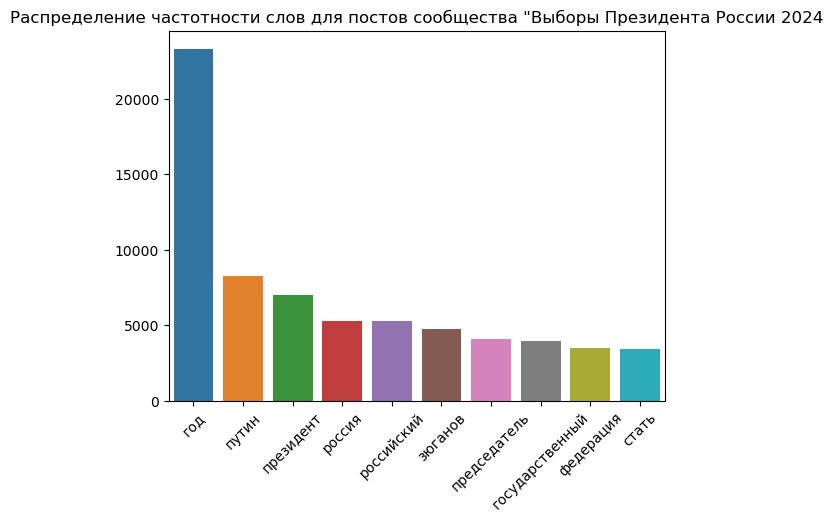

In [143]:
count, words = [], []
for w in all_words_freq_posts.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов для постов сообщества "Выборы Президента России 2024')
plt.show()

In [91]:
stop_words_ex = ['год','это', 'который']
def stop_words_extra(text):
    return [w for w in text if not w in stop_words_ex]

In [144]:
# применяем функцию к датафрейму с помощью метода .apply()
tokens = df_posts.tokenized.apply(stop_words_extra)

In [145]:
# добавляем новую колонку в исходный датафрейм
df_posts = df_posts.assign(tokens=tokens)
df_posts.head()

,Unnamed: 0,post_id,post_text,tokenized,tokens
0,0,12103,"Итак 2024 наступил и скоро выборы, за кого гол...","[итак, наступить, скоро, выборы, кто, голосовать]","[итак, наступить, скоро, выборы, кто, голосовать]"
1,1,12266,Последнего реального кандидата от оппозиции и ...,"[последний, реальный, кандидат, оппозиция, либ...","[последний, реальный, кандидат, оппозиция, либ..."
2,2,12228,"Минутка на оппозицию...\n⚡«Неllо, Еlеnа Zelens...","[минутка, оппозиция, еlеn, байден, пoпpиветcтв...","[минутка, оппозиция, еlеn, байден, пoпpиветcтв..."
3,3,12191,"Не допущен к выборам, по опросам у него не бол...","[допустить, выборы, опрос, последователь, увер...","[допустить, выборы, опрос, последователь, увер..."
4,4,12183,Более не сможет быть кандидатом в Президенты -...,"[смочь, кандидат, президент, умереть, колония,...","[смочь, кандидат, президент, умереть, колония,..."


In [146]:
words_list_posts_new = list(df_posts['tokens'])


In [147]:
all_words_posts_new = np.concatenate(words_list_posts_new)

all_words_freq_posts_new = FreqDist(all_words_posts_new)

print("Наиболлее популярные слова: ", all_words_freq_posts_new.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_posts_new.keys()))

Наиболлее популярные слова:  [('путин', 8292), ('президент', 6977), ('россия', 5312), ('российский', 5249), ('зюганов', 4758), ('председатель', 4082), ('государственный', 3955), ('федерация', 3522), ('стать', 3433), ('владимир', 2982), ('правительство', 2900), ('должность', 2843), ('первый', 2593), ('свой', 2472), ('совет', 2462), ('сергей', 2405), ('партия', 2347), ('комитет', 2347), ('выборы', 2238), ('заместитель', 2226), ('работа', 2216), ('пост', 2130), ('май', 2073), ('назначить', 2034), ('глава', 2013), ('рф', 1931), ('также', 1840), ('управление', 1806), ('депутат', 1762), ('экономический', 1757), ('санктпетербург', 1757), ('га', 1704), ('дума', 1692), ('республика', 1691), ('работать', 1670), ('связь', 1665), ('март', 1656), ('ссср', 1642), ('руководитель', 1635), ('вопрос', 1623), ('ельцин', 1516), ('время', 1500), ('город', 1416), ('декабрь', 1398), ('кгб', 1397), ('политический', 1392), ('страна', 1379), ('международный', 1378), ('комиссия', 1299), ('власть', 1296), ('инсти

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


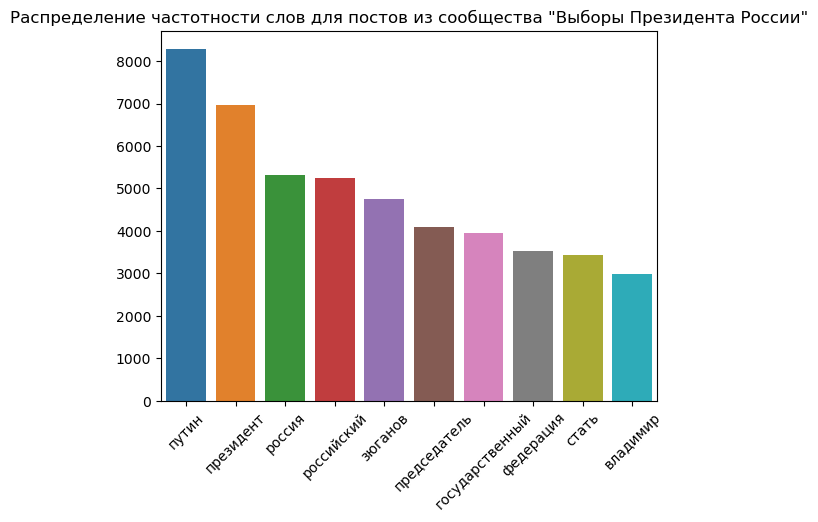

In [148]:
count, words = [], []
for w in all_words_freq_posts_new.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов для постов из сообщества "Выборы Президента России"')
plt.show()

**2. Комменитарии к постам сообщества "Выборы Президенрта России 2024"**

In [128]:
# применяем функцию к датафрейму с помощью метода .apply()
tokens = df_comments.tokenized.apply(stop_words_extra)

In [130]:
df_comments = df_comments.assign(tokens=tokens)
df_comments.head()

,Unnamed: 0,post_id,comments_text,tokenized,tokens
0,0,12103.0,"Зачем эта игра в ""демократию"" ?! Результат уже...","[этот, игра, демократия, результат, итак, изве...","[этот, игра, демократия, результат, итак, изве..."
1,1,12103.0,За Бориса Борисовича Надеждина!!!,"[борис, борисович, надеждин]","[борис, борисович, надеждин]"
2,5,12103.0,"Я бы вообще , голосовал за Ярослава Нилова !","[вообще, голосовать, ярослав, ниловый]","[вообще, голосовать, ярослав, ниловый]"
3,6,12103.0,"Интересно, если бы хоть раз выборы прошли чест...","[интересно, выборы, пройти, честно, расклад, д...","[интересно, выборы, пройти, честно, расклад, д..."
4,7,12103.0,Выборы - без выбора. Вообще не за кого!!!,"[выборы, выбор, вообще, кто]","[выборы, выбор, вообще, кто]"


In [131]:
words_list_comments = list(df_comments['tokens'])

In [133]:
all_words_comments = np.concatenate(words_list_comments)

all_words_freq_comments = FreqDist(all_words_comments)

print("Наиболлее популярные слова: ", all_words_freq_comments.most_common(100))
print("\nОбщее количество уникальных слов: ", len(all_words_freq_comments.keys()))

Наиболлее популярные слова:  [('путин', 1070), ('россия', 864), ('свой', 774), ('человек', 685), ('грудинин', 602), ('наш', 595), ('страна', 591), ('народ', 545), ('президент', 484), ('деньга', 418), ('весь', 392), ('выборы', 385), ('такой', 369), ('власть', 322), ('быть', 310), ('всё', 303), ('один', 300), ('жить', 290), ('государство', 279), ('знать', 273), ('русский', 272), ('говорить', 261), ('кандидат', 260), ('время', 258), ('сам', 254), ('сделать', 252), ('просто', 249), ('голосовать', 245), ('хотеть', 232), ('делать', 230), ('тот', 228), ('навальный', 227), ('каждый', 219), ('другой', 218), ('мочь', 214), ('новый', 210), ('должный', 204), ('стать', 200), ('мы', 196), ('какой', 190), ('вообще', 178), ('война', 176), ('иметь', 174), ('кто', 169), ('сказать', 169), ('ваш', 168), ('очень', 168), ('почему', 166), ('работать', 165), ('против', 164), ('этот', 159), ('мир', 158), ('сша', 156), ('гражданин', 155), ('идти', 154), ('никто', 154), ('дать', 154), ('нужно', 154), ('день', 15

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


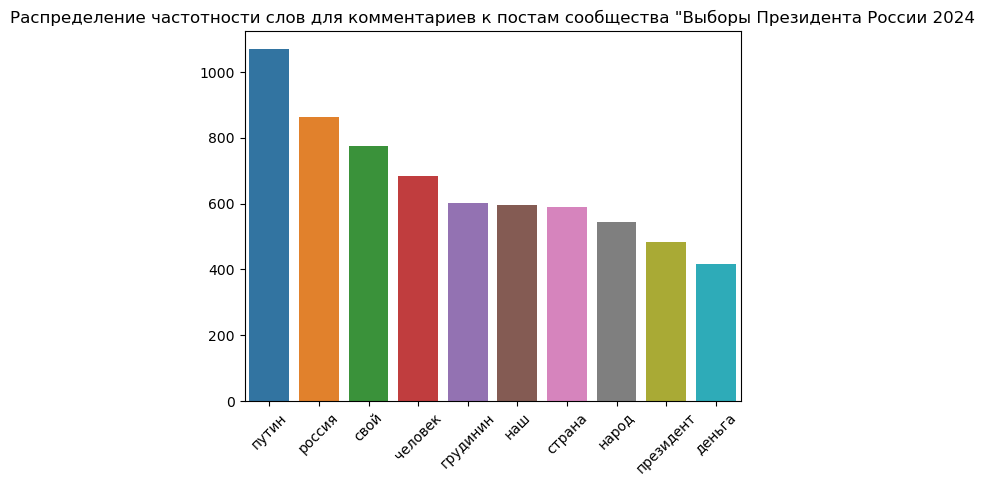

In [135]:
count, words = [], []
for w in all_words_freq_comments.most_common(10):
    words.append(w[0])
    count.append(w[1])

ax = sns.barplot(x=words,y=count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title ('Распределение частотности слов для комментариев к постам сообщества "Выборы Президента России 2024')
plt.show()

In [149]:
df_posts.to_csv('posts_tokenised.csv')

In [136]:
df_comments.to_csv('comments_tokenised.csv')